In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
!ls "/content/drive/My Drive/ColabNotebooks/upload"

pepper_bacterial_spot  potato_early_bight  Tomato_Bacterial_Spot


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [28]:
print(tf. __version__)

2.15.0


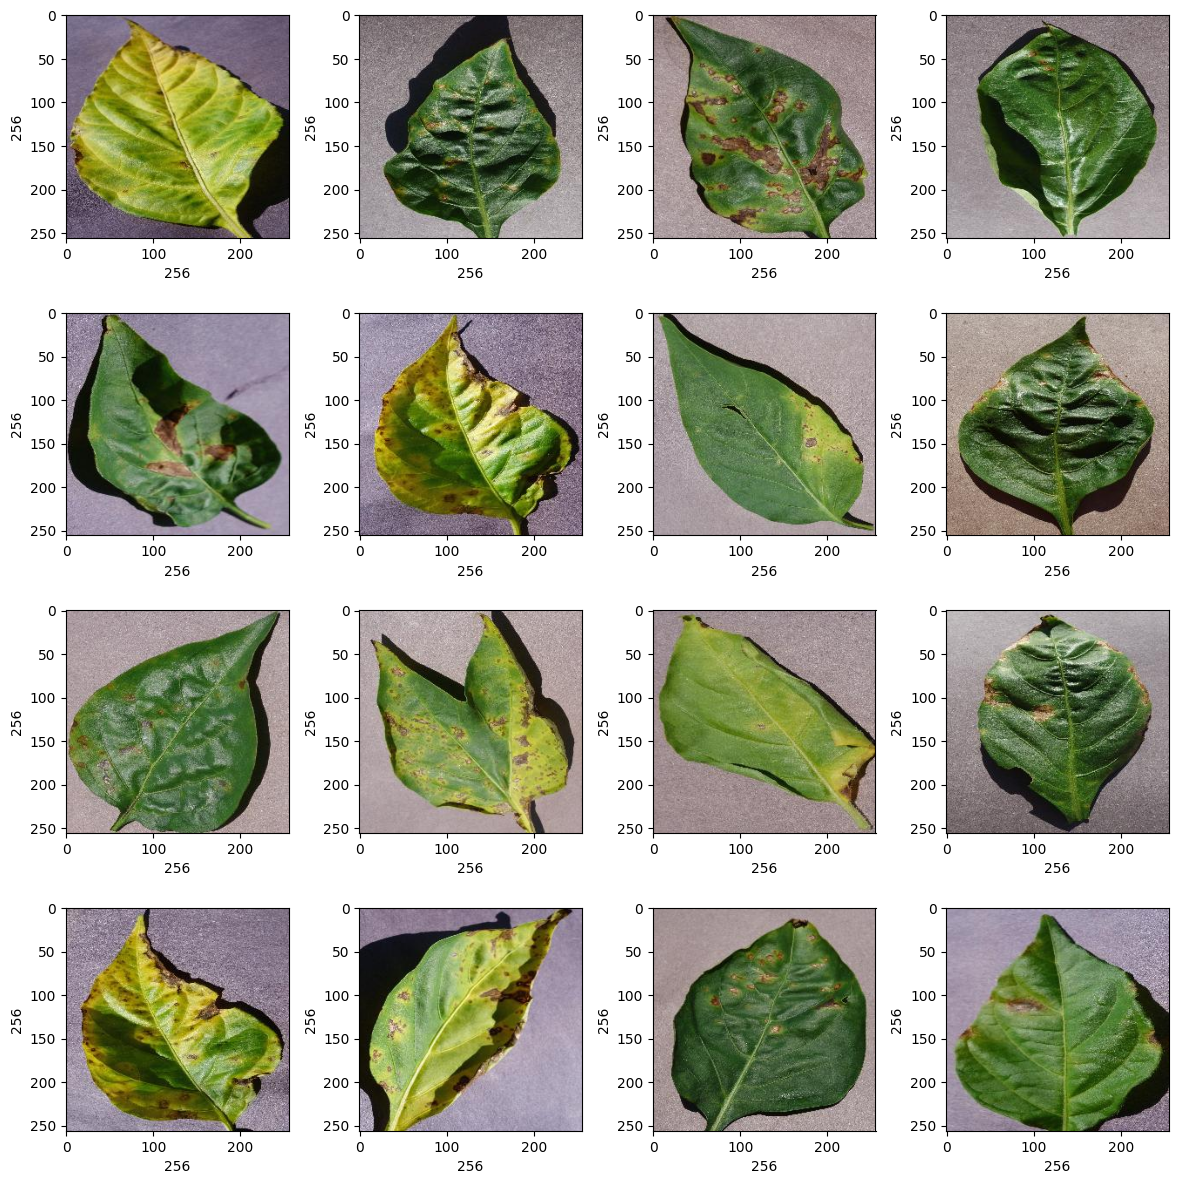

In [29]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/ColabNotebooks/upload/pepper_bacterial_spot"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
  plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [30]:
#convert images to array
def convert_image_to_array(image_dir):
  try:
      image = cv2.imread(image_dir)
      if image is not None :
        image = cv2.resize(image, (256,256))
        return img_to_array(image)
      else :
        return np.array([])
  except Exception as e:
      print(f"Error : {e}")
      return None


In [31]:

dir = "/content/drive/My Drive/ColabNotebooks/upload"
image_list, label_list=[],[]
all_labels=['pepper_bacterial_spot','potato_early_bight','Tomato_Bacterial_Spot']
binary_levels=[0,1,2]
temp=-1
# Reading and converting image to numpy array
for directory in ['pepper_bacterial_spot','potato_early_bight','Tomato_Bacterial_Spot'] :
  plant_image_list = listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_levels[temp])



In [32]:
#visualize the number classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()



0    302
1    302
2    302
dtype: int64

In [33]:
image_list[0].shape

(256, 256, 3)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)





In [35]:
 x_train =np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 256,256,3)
x_test =x_test.reshape( -1,256,256,3)

In [36]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])



In [39]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [40]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))



Epoch 1/50
5/5 [==============================] - 45s 8s/step - loss: 1.0842 - accuracy: 0.3420 - val_loss: 1.0446 - val_accuracy: 0.4759
Epoch 2/50
5/5 [==============================] - 29s 6s/step - loss: 1.0332 - accuracy: 0.4715 - val_loss: 1.0073 - val_accuracy: 0.5103
Epoch 3/50
5/5 [==============================] - 31s 6s/step - loss: 0.9893 - accuracy: 0.5302 - val_loss: 0.9712 - val_accuracy: 0.5034
Epoch 4/50
5/5 [==============================] - 30s 6s/step - loss: 0.9397 - accuracy: 0.5630 - val_loss: 0.9235 - val_accuracy: 0.7172
Epoch 5/50
5/5 [==============================] - 34s 7s/step - loss: 0.8952 - accuracy: 0.6736 - val_loss: 0.9005 - val_accuracy: 0.6414
Epoch 6/50
5/5 [==============================] - 31s 6s/step - loss: 0.8434 - accuracy: 0.7617 - val_loss: 0.8319 - val_accuracy: 0.7310
Epoch 7/50
5/5 [==============================] - 29s 6s/step - loss: 0.7903 - accuracy: 0.7824 - val_loss: 0.8022 - val_accuracy: 0.7379
Epoch 8/50
5/5 [==================

In [ ]:
####################model upload should be done######################3

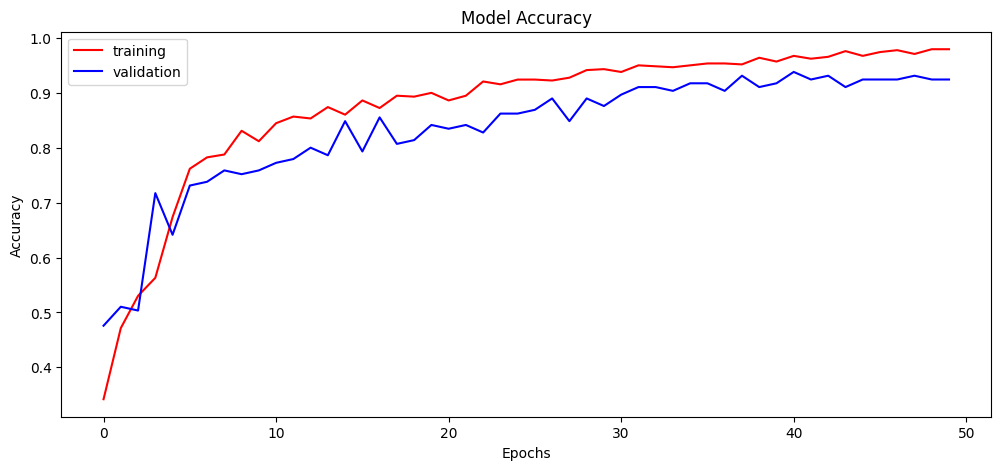

In [41]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training', 'validation'])

plt.show()

In [42]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")



Calculating model accuracy
6/6 [==============================] - 4s 459ms/step - loss: 0.2225 - accuracy: 0.9121
Test Accuracy: 91.20879173278809


In [43]:
y_pred=model.predict(x_test)

6/6 [==============================] - 3s 456ms/step


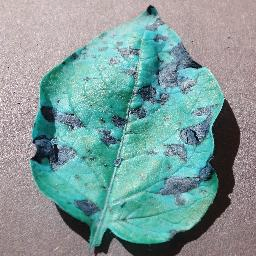

In [44]:
img=array_to_img(x_test[11])
img

In [45]:
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print (y_pred[2])

Original Label:  potato_early_bight
Predicted Label:  potato_early_bight
[1.4822663e-02 9.8517257e-01 4.6894957e-06]


In [46]:
for i in range(50):
  print (all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])

potato_early_bight - potato_early_bight
pepper_bacterial_spot - pepper_bacterial_spot
potato_early_bight - potato_early_bight
Tomato_Bacterial_Spot - Tomato_Bacterial_Spot
potato_early_bight - potato_early_bight
pepper_bacterial_spot - pepper_bacterial_spot
potato_early_bight - potato_early_bight
pepper_bacterial_spot - pepper_bacterial_spot
Tomato_Bacterial_Spot - Tomato_Bacterial_Spot
Tomato_Bacterial_Spot - Tomato_Bacterial_Spot
potato_early_bight - potato_early_bight
potato_early_bight - potato_early_bight
pepper_bacterial_spot - pepper_bacterial_spot
pepper_bacterial_spot - pepper_bacterial_spot
potato_early_bight - potato_early_bight
potato_early_bight - potato_early_bight
potato_early_bight - potato_early_bight
pepper_bacterial_spot - potato_early_bight
Tomato_Bacterial_Spot - Tomato_Bacterial_Spot
Tomato_Bacterial_Spot - Tomato_Bacterial_Spot
Tomato_Bacterial_Spot - Tomato_Bacterial_Spot
potato_early_bight - potato_early_bight
pepper_bacterial_spot - pepper_bacterial_spot
Tomat